In [1]:
import pandas as pd
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# get data from : https://www.kaggle.com/uciml/sms-spam-collection-dataset#
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Pre-processamento

In [4]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [5]:
# Isso pode serfeito da seguinte maneira 
# data = data.rename(columns={"v1":"label", "v2":"text"})
data.columns = ['label', 'text']

In [6]:
data.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [7]:
data['target'] = data.label.map({'ham':0, 'spam':1})

In [8]:
data.tail()

,label,text,target
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


# Extração de caracteristicas

In [9]:
vect = CountVectorizer()

In [10]:
#TI-IDF - O valor tf–idf de uma palavra aumenta proporcionalmente 
# à medida que aumenta o número de ocorrências dela em um documento, 
# no entanto, esse valor é equilibrado pela frequência da palavra no corpus. 
# Isso auxilia a distinguir o fato da ocorrência de algumas palavras serem geralmente mais comuns que outras.
#TI - É a frequencia na qual uma palavra ocorre no texto
#IDF - É um pedo de cada palavra onde cada peso almenta a medida que uma palavra aparece no texto

# vect = TfidfVectorizer()

In [11]:
# Uma outra opção seria fazer desta maneira
#vect.fit(X_train) #Learn a vocabulary dictionary of all tokens in the raw documents.
#X_train_transform = vect.transform(X_train) #Transform documents to document-term matrix.

#Learn the vocabulary dictionary and return term-document matrix.
data_transform = vect.fit_transform(data['text'])

# Obtendo a ocorrencia da palavra

In [12]:
def get_top_n_words(data_transform, n=10):
    """
        data_transform: term-document matrix
        n: Number of elements to show
    """
    sum_words = data_transform.sum(axis=0)#soma todas as ocorrencia da palavra no texto
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq = sorted(words_freq, key =  lambda x: x[1], reverse=True)
    common_words = words_freq[:n]
    for word, freq in common_words:
        print(word,freq)
    return common_words

In [13]:
common_words = get_top_n_words(data_transform, 10)

to 2242
you 2240
the 1328
and 979
in 898
is 890
me 802
my 762
it 744
for 704


In [14]:
# visualize the data
def visualize(label):
  words = ''
  for msg in data[data['label'] == label]['text']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

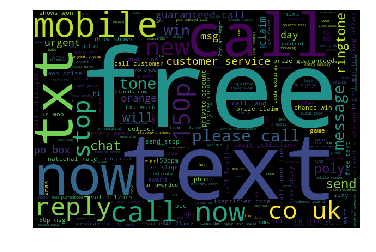

In [15]:
visualize('spam')

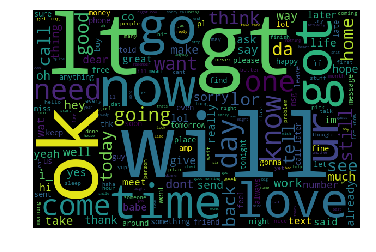

In [16]:
visualize('ham')

# Separando conjunto de dados

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_transform, data['target'], test_size = 0.3, random_state = 10)

# Classificando

In [18]:
modelNB = MultinomialNB()
#Treinando
modelNB.fit(X_train, y_train)
# Calculando a acuracia
print("Train score:", modelNB.score(X_test, y_test))

Train score: 0.9838516746411483


In [19]:
modelKNN = KNeighborsClassifier(n_neighbors=3)
#Treinando
modelKNN.fit(X_train, y_train)
# Calculando a acuracia
print("Train score:", modelKNN.score(X_test, y_test))

Train score: 0.9288277511961722


In [20]:
modelTree = tree.DecisionTreeClassifier()
modelTree.fit(X_train, y_train)
# Calculando a acuracia
print("Train score:", modelTree.score(X_test, y_test))

Train score: 0.9700956937799043


In [21]:
clf = SVC()
clf.fit(X_train, y_train)
# Calculando a acuracia
print("Train score:", clf.score(X_test, y_test))

Train score: 0.8648325358851675


In [22]:
linearSVC = LinearSVC(random_state=0)
linearSVC.fit(X_train, y_train)
# Calculando a acuracia
print("Train score:", linearSVC.score(X_test, y_test))

Train score: 0.9850478468899522


# Hyperparametrização

In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[1,10],'weights':['uniform', 'distance'],  'algorithm':['auto', 'brute']}
grid_search = GridSearchCV(modelKNN, parameters, cv=5, scoring= 'accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [24]:
print("Train score:", grid_search.score(X_test, y_test))

Train score: 0.9533492822966507


In [25]:
parameters = {'random_state':[0,10]}
grid_search = GridSearchCV(linearSVC, parameters, cv=5, scoring= 'accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'random_state': 0}

In [26]:
print("Train score:", grid_search.score(X_test, y_test))

Train score: 0.9850478468899522


In [27]:
linearSVC = LinearSVC(random_state=grid_search.best_params_['random_state'])
linearSVC.fit(X_train, y_train)
y_pred = linearSVC.predict(X_test)

In [28]:
target_names = data.label.unique()
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      1446
       spam       0.99      0.90      0.94       226

avg / total       0.99      0.99      0.98      1672

